神经网络（Neural Network）是一种模仿人脑结构和功能的计算模型。它由大量的人工神经元（节点）组成，这些神经元通过连接（边）相互通信。神经网络的设计灵感来源于生物神经系统，特别是大脑中的神经元和它们之间的连接。

### 基本结构
神经网络的基本结构包括输入层、隐藏层和输出层。

1. **输入层（Input Layer）**：接受原始数据输入，每个节点代表一个特征。
2. **隐藏层（Hidden Layer）**：位于输入层和输出层之间，负责数据的处理和特征提取，可以有一个或多个隐藏层。
3. **输出层（Output Layer）**：生成最终的输出，每个节点代表一个预测或分类结果。

每个连接（边）都有一个权重（weight），每个节点都有一个偏置（bias），它们一起决定了数据如何从一层传递到下一层。

### 工作原理
神经网络通过以下几个步骤进行工作：

1. **前向传播（Forward Propagation）**：输入数据通过输入层传递到隐藏层，再传递到输出层。每一层的输出是上一层输出的线性组合，加上偏置，然后通过激活函数（如ReLU、Sigmoid等）进行非线性变换。
2. **损失计算（Loss Calculation）**：通过损失函数（如均方误差、交叉熵等）计算网络预测结果与实际结果之间的差异。
3. **反向传播（Backpropagation）**：通过梯度下降算法，逐层调整权重和偏置，以最小化损失函数的值。
4. **更新权重（Weight Update）**：调整后的权重和偏置用于下一轮前向传播。

### 直觉理解
可以将神经网络比作一个强大的函数逼近器，它能够学习和拟合复杂的非线性函数关系。输入数据通过一系列的线性和非线性变换，逐步提取特征，最终输出结果。

### Python示例
下面是一个简单的Python代码示例，使用`numpy`库构建和训练一个简单的神经网络来解决分类问题，并可视化训练过程中的损失变化。


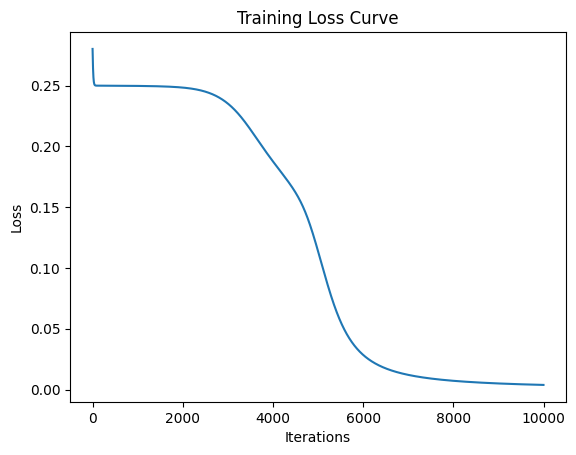

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 激活函数和其导数
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# 输入数据（4个样本，每个样本有2个特征）
inputs = np.array([[0, 0],
                   [0, 1],
                   [1, 0],
                   [1, 1]])

# 输出数据（4个样本，每个样本有1个输出）
outputs = np.array([[0],
                    [1],
                    [1],
                    [0]])

# 初始化权重和偏置
np.random.seed(1)
input_layer_neurons = inputs.shape[1]
hidden_layer_neurons = 2
output_neurons = 1

hidden_weights = np.random.uniform(size=(input_layer_neurons, hidden_layer_neurons))
hidden_bias = np.random.uniform(size=(1, hidden_layer_neurons))
output_weights = np.random.uniform(size=(hidden_layer_neurons, output_neurons))
output_bias = np.random.uniform(size=(1, output_neurons))

# 学习率
learning_rate = 0.1

# 训练神经网络
losses = []
for _ in range(10000):
    # 前向传播
    hidden_layer_activation = np.dot(inputs, hidden_weights) + hidden_bias
    hidden_layer_output = sigmoid(hidden_layer_activation)

    output_layer_activation = np.dot(hidden_layer_output, output_weights) + output_bias
    predicted_output = sigmoid(output_layer_activation)

    # 计算损失
    loss = np.mean((outputs - predicted_output) ** 2)
    losses.append(loss)

    # 反向传播
    error = outputs - predicted_output
    d_predicted_output = error * sigmoid_derivative(predicted_output)

    error_hidden_layer = d_predicted_output.dot(output_weights.T)
    d_hidden_layer = error_hidden_layer * sigmoid_derivative(hidden_layer_output)

    # 更新权重和偏置
    output_weights += hidden_layer_output.T.dot(d_predicted_output) * learning_rate
    output_bias += np.sum(d_predicted_output, axis=0, keepdims=True) * learning_rate
    hidden_weights += inputs.T.dot(d_hidden_layer) * learning_rate
    hidden_bias += np.sum(d_hidden_layer, axis=0, keepdims=True) * learning_rate

# 绘制损失曲线
plt.plot(losses)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Training Loss Curve')
plt.show()

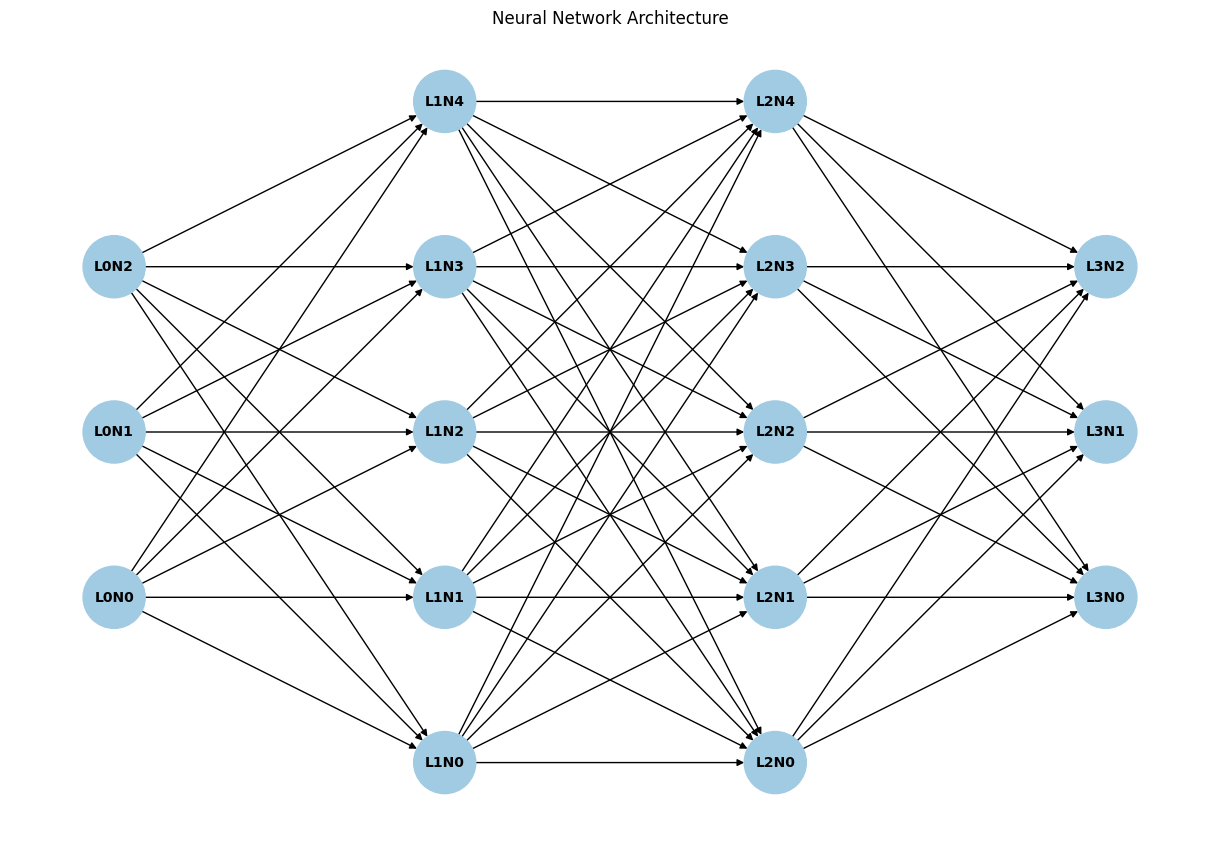

In [8]:
import matplotlib.pyplot as plt
import networkx as nx

def draw_neural_network_v2(layers):
    G = nx.DiGraph()
    
    pos = {}
    node_sizes = []
    node_colors = []
    labels = {}
    layer_dist = 2
    node_dist = 1
    
    for i, layer_size in enumerate(layers):
        for j in range(layer_size):
            node_id = f"L{i}N{j}"
            G.add_node(node_id)
            pos[node_id] = (i * layer_dist, j * node_dist - (layer_size - 1) * node_dist / 2)
            node_sizes.append(2000)
            node_colors.append('#A0CBE2')
            labels[node_id] = f"{node_id}"
            
            if i > 0:
                for k in range(layers[i-1]):
                    prev_node_id = f"L{i-1}N{k}"
                    G.add_edge(prev_node_id, node_id)
    
    plt.figure(figsize=(12, 8))
    nx.draw(G, pos, with_labels=True, node_size=node_sizes, node_color=node_colors, labels=labels, font_size=10, font_weight='bold', arrows=True)
    plt.title("Neural Network Architecture")
    plt.show()

# Define the neural network layers: input layer with 3 neurons, two hidden layers each with 5 neurons, output layer with 3 neurons
layers = [3, 5, 5, 3]
draw_neural_network_v2(layers)

神经网络的计算公式通常包括线性组合、激活函数和前向传播。以下是常见的计算公式：

### 1. 线性组合
每个神经元的输入是前一层神经元输出的线性组合，加上一个偏置项。假设第$ l $层的第$ j $个神经元的输入表示为 $ z_j^{(l)} $，那么计算公式为：
$$
z_j^{(l)} = \sum_{i} w_{ij}^{(l-1)} a_i^{(l-1)} + b_j^{(l)}
$$
其中：
- $ w_{ij}^{(l-1)} $ 是第$ l-1 $层的第$ i $个神经元到第$ l $层的第$ j $个神经元的权重
- $ a_i^{(l-1)} $ 是第$ l-1 $层的第$ i $个神经元的激活值
- $ b_j^{(l)} $ 是第$ l $层的第$ j $个神经元的偏置

### 2. 激活函数
为了引入非线性，每个神经元的输入 $ z_j^{(l)} $ 通过一个激活函数 $ \sigma $ 进行变换，得到该神经元的输出 $ a_j^{(l)} $：
$$
a_j^{(l)} = \sigma(z_j^{(l)})
$$

常见的激活函数有：
- Sigmoid 函数：$$ \sigma(z) = \frac{1}{1 + e^{-z}} $$
- ReLU 函数：$$ \sigma(z) = \max(0, z) $$
- Tanh 函数：$$ \sigma(z) = \tanh(z) $$

### 3. 前向传播
对于整个网络，从输入层到输出层，逐层计算神经元的输出。假设输入层为 $ \mathbf{x} $，输出层为 $ \mathbf{y} $，神经网络的前向传播可以表示为：
$$
\begin{align*}
\mathbf{z}^{(1)} &= \mathbf{W}^{(0)} \mathbf{x} + \mathbf{b}^{(1)} \\
\mathbf{a}^{(1)} &= \sigma(\mathbf{z}^{(1)}) \\
\mathbf{z}^{(2)} &= \mathbf{W}^{(1)} \mathbf{a}^{(1)} + \mathbf{b}^{(2)} \\
\mathbf{a}^{(2)} &= \sigma(\mathbf{z}^{(2)}) \\
&\vdots \\
\mathbf{z}^{(L)} &= \mathbf{W}^{(L-1)} \mathbf{a}^{(L-1)} + \mathbf{b}^{(L)} \\
\mathbf{a}^{(L)} &= \sigma(\mathbf{z}^{(L)})
\end{align*}
$$

其中：
- $ \mathbf{W}^{(l)} $ 是第$ l $层的权重矩阵
- $ \mathbf{b}^{(l)} $ 是第$ l $层的偏置向量
- $ \mathbf{a}^{(l)} $ 是第$ l $层的激活值向量

这些公式综合起来，就描述了神经网络的计算过程。

### 激活函数
作用：将线性变换的输出转化为非线性函数，从而实现非线性映射。

常用于隐藏层的激活函数：

1. Sigmoid 函数：

   $$Sigmoid(x)=\frac{1}{1+e^{-x}}$$

2. ReLU 函数：

   $$ReLU(x)=\max(0,x)$$

3. Leaky ReLU 函数：

  $$LeakyReLU(x)=\max(0,z)$$

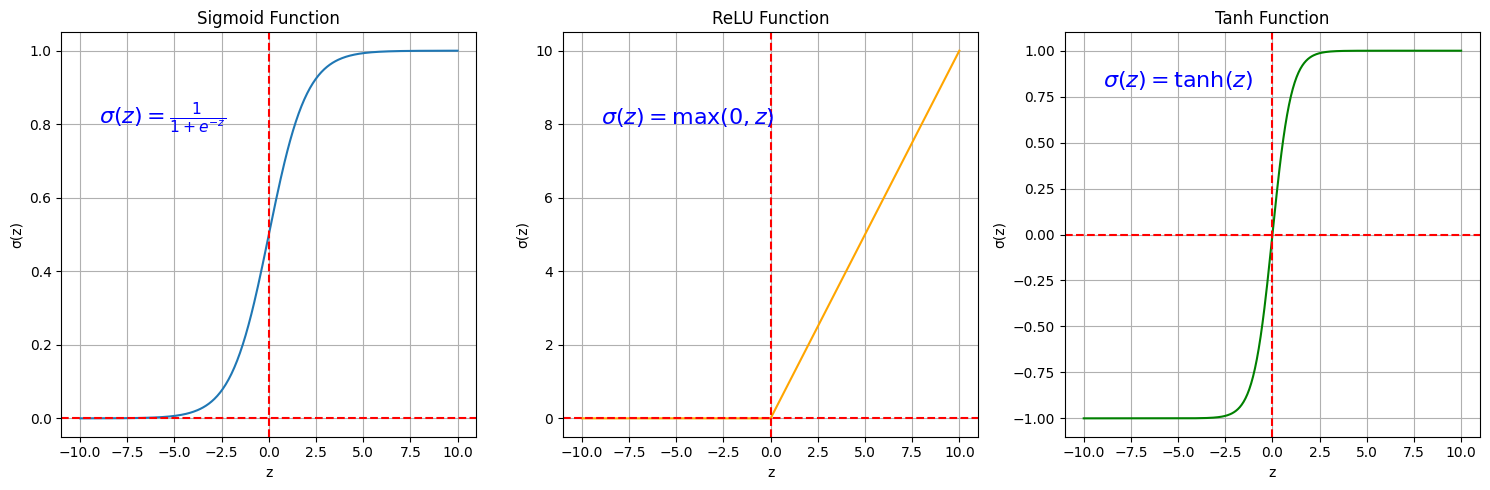

In [12]:
# Plot the activation functions with red dashed lines marking 0 and add function formulas
plt.figure(figsize=(15, 5))

# Sigmoid function plot
plt.subplot(1, 3, 1)
plt.plot(z, sigmoid_values, label="Sigmoid")
plt.axhline(0, color='red', linestyle='--')
plt.axvline(0, color='red', linestyle='--')
plt.title("Sigmoid Function")
plt.xlabel("z")
plt.ylabel("σ(z)")
plt.grid(True)
plt.text(-9, 0.8, r'$\sigma(z) = \frac{1}{1 + e^{-z}}$', fontsize=16, color='blue')

# ReLU function plot
plt.subplot(1, 3, 2)
plt.plot(z, relu_values, label="ReLU", color="orange")
plt.axhline(0, color='red', linestyle='--')
plt.axvline(0, color='red', linestyle='--')
plt.title("ReLU Function")
plt.xlabel("z")
plt.ylabel("σ(z)")
plt.grid(True)
plt.text(-9, 8, r'$\sigma(z) = \max(0, z)$', fontsize=16, color='blue')

# Tanh function plot
plt.subplot(1, 3, 3)
plt.plot(z, tanh_values, label="Tanh", color="green")
plt.axhline(0, color='red', linestyle='--')
plt.axvline(0, color='red', linestyle='--')
plt.title("Tanh Function")
plt.xlabel("z")
plt.ylabel("σ(z)")
plt.grid(True)
plt.text(-9, 0.8, r'$\sigma(z) = \tanh(z)$', fontsize=16, color='blue')

plt.tight_layout()
plt.show()


Softmax 函数是一种常用于多分类问题输出层的激活函数。它将原始的得分（logits）转换为概率分布，概率的和为 1。Softmax 函数的计算公式如下：

### Softmax 函数公式
给定一个输入向量 $ \mathbf{z} = [z_1, z_2, \dots, z_n] $，Softmax 函数 $ \sigma(\mathbf{z}) $ 的输出向量 $ \mathbf{y} = [y_1, y_2, \dots, y_n] $ 中每个元素的计算公式为：

$$
y_i = \frac{e^{z_i}}{\sum_{j=1}^{n} e^{z_j}}
$$

其中：
- $ y_i $ 是第 $ i $ 个类别的概率
- $ z_i $ 是第 $ i $ 个类别的输入得分（logit）
- $ n $ 是类别的总数
- $ e $ 是自然对数的底（约等于 2.71828）

### 计算步骤
1. **计算每个类别的指数得分**：对每个输入得分 $ z_i $，计算 $ e^{z_i} $。
2. **计算所有类别的指数得分的和**：将所有类别的指数得分相加，得到 $ \sum_{j=1}^{n} e^{z_j} $。
3. **归一化**：将每个类别的指数得分除以步骤 2 中的和，得到每个类别的概率 $ y_i $。

### 例子
假设输入向量 $ \mathbf{z} = [2.0, 1.0, 0.1] $，计算 Softmax 输出的步骤如下：

1. 计算指数得分：
   $$
   e^{2.0} \approx 7.389
   $$
   $$
   e^{1.0} \approx 2.718
   $$
   $$
   e^{0.1} \approx 1.105
   $$

2. 计算指数得分的和：
   $$
   7.389 + 2.718 + 1.105 \approx 11.212
   $$

3. 归一化，计算每个类别的概率：
   $$
   y_1 = \frac{7.389}{11.212} \approx 0.659
   $$
   $$
   y_2 = \frac{2.718}{11.212} \approx 0.242
   $$
   $$
   y_3 = \frac{1.105}{11.212} \approx 0.099
   $$

最终输出向量 $ \mathbf{y} $ 为：
$$
\mathbf{y} \approx [0.659, 0.242, 0.099]
$$

### 公式总结
Softmax 函数将原始得分转换为概率分布，确保每个类别的概率在 0 和 1 之间，且所有类别的概率和为 1。它的公式如下：

$$
y_i = \frac{e^{z_i}}{\sum_{j=1}^{n} e^{z_j}}
$$

这使得 Softmax 非常适合用于多分类问题的输出层。

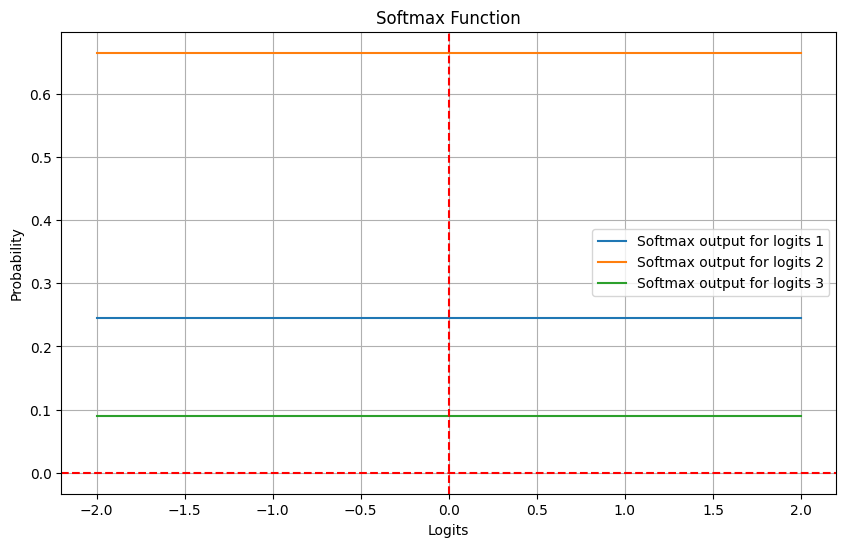

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Define the softmax function
def softmax(z):
    exp_z = np.exp(z)
    return exp_z / np.sum(exp_z, axis=0)

# Generate a range of input values
z = np.linspace(-2, 2, 100)

# Compute the softmax outputs for three sets of logits
logits = np.array([z, z + 1, z - 1])
softmax_values = softmax(logits)

# Plot the softmax function outputs
plt.figure(figsize=(10, 6))

for i in range(softmax_values.shape[0]):
    plt.plot(z, softmax_values[i], label=f'Softmax output for logits {i+1}')

plt.title('Softmax Function')
plt.xlabel('Logits')
plt.ylabel('Probability')
plt.axhline(0, color='red', linestyle='--')
plt.axvline(0, color='red', linestyle='--')
plt.legend()
plt.grid(True)
plt.show()


在神经网络的训练过程中，正向传播和反向传播是两个关键步骤。下面我将详细讲解这两个过程。

### 正向传播（Forward Propagation）

正向传播是计算神经网络输出的过程。这个过程从输入层开始，一层一层地计算每个神经元的输出，直到输出层。

1. **输入层**：输入层的神经元直接接收输入数据，没有计算。

2. **隐藏层和输出层**：每个神经元的计算过程如下：
   - **线性组合**：对输入加权求和，加上偏置（bias）
     $$
     z_j^{(l)} = \sum_{i} w_{ij}^{(l-1)} a_i^{(l-1)} + b_j^{(l)}
     $$
     其中，$ z_j^{(l)} $ 是第 $ l $ 层第 $ j $ 个神经元的加权和，$ w_{ij}^{(l-1)} $ 是第 $ l-1 $ 层第 $ i $ 个神经元到第 $ l $ 层第 $ j $ 个神经元的权重，$ a_i^{(l-1)} $ 是第 $ l-1 $ 层第 $ i $ 个神经元的激活值，$ b_j^{(l)} $ 是第 $ l $ 层第 $ j $ 个神经元的偏置。
   - **激活函数**：对加权和应用激活函数，得到输出值
     $$
     a_j^{(l)} = \sigma(z_j^{(l)})
     $$

### 反向传播（Back Propagation）

反向传播是计算损失函数相对于每个权重和偏置的梯度的过程，这些梯度用于更新网络的参数，以最小化损失函数。这个过程从输出层开始，逐层向回计算。

1. **计算输出层误差**：
   - 假设损失函数为均方误差（MSE）
     $$
     \delta_j^{(L)} = \frac{\partial L}{\partial a_j^{(L)}} = a_j^{(L)} - y_j
     $$
     其中，$ \delta_j^{(L)} $ 是输出层第 $ j $ 个神经元的误差，$ a_j^{(L)} $ 是输出层第 $ j $ 个神经元的激活值，$ y_j $ 是实际值。

2. **计算隐藏层误差**：
   - 使用链式法则
     $$
     \delta_j^{(l)} = \frac{\partial L}{\partial a_j^{(l)}} = \sum_{k} \delta_k^{(l+1)} w_{jk}^{(l)} \sigma'(z_j^{(l)})
     $$
  
     其中，$ delta_j^{(l)} $ 是第 $ l $  层第 $ j $ 个神经元的误差，$ delta_k^{(l+1)} $ 是第 $ l+1 $ 层第 $ k $ 个神经元的误差，$ w_{jk}^{(l)} $ 是第 $ l $ 层第 $ j $ 个神经元到第 $ l+1 $ 层第 $ k $ 个神经元的权重，$ \sigma'(z_j^{(l)}) $ 是第 $ l $ 层第 $ j $ 个神经元的激活函数的导数。

3. **计算梯度**：
   - 权重梯度
     $$
     \frac{\partial L}{\partial w_{ij}^{(l)}} = \delta_j^{(l)} a_i^{(l-1)}
     $$
   - 偏置梯度
     $$
     \frac{\partial L}{\partial b_j^{(l)}} = \delta_j^{(l)}
     $$

4. **更新权重和偏置**：
   - 使用梯度下降法更新参数
     $$
     w_{ij}^{(l)} := w_{ij}^{(l)} - \eta \frac{\partial L}{\partial w_{ij}^{(l)}}
     $$
     $$
     b_j^{(l)} := b_j^{(l)} - \eta \frac{\partial L}{\partial b_j^{(l)}}
     $$
     其中，$ \eta $ 是学习率。

### 总结

正向传播是从输入层到输出层计算网络输出的过程，反向传播是从输出层到输入层计算梯度并更新网络参数的过程。这两个过程结合起来，使神经网络能够通过调整权重和偏置来学习数据中的模式。